Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [12]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matrixom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [13]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

In [14]:
def poly3(x):
    return x**3+2*x**2

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
X_poly = poly.fit_transform(X)
print(X_poly)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [17]:
from numpy import linalg

In [18]:
# Vaš kôd ovdje
invers = linalg.inv(np.matmul(X_poly.transpose(),X_poly))
pseudoinvers = np.matmul(invers,X_poly.transpose())
w = np.matmul(pseudoinvers,y)
w1 = np.matmul(linalg.pinv(X_poly),y)
print(w1)

[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

4.085714285714286
2.042857142857143
[2.2        2.65714286 3.11428571 4.02857143]


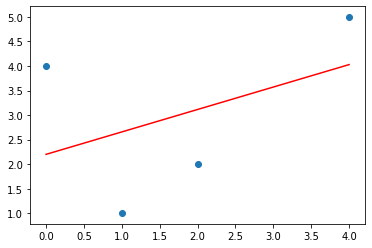

In [19]:
# Vaš kôd ovdje
from sklearn.metrics import mean_squared_error
import scipy as sp


def h(x):
    return w[1]*x + w[0]

def squared_loss(y,hx):
    return (y-hx)**2

def mean_square_error(X,y):
    error = 0
    if(len(X) != len(y)):
        exit("Dimension error!")
    for i in range(len(X)):
         error = error + squared_loss(y[i],h(X[i]))
    return error*0.5

def predicted(X):
    predicted_values = list()
    for i in range(len(X)):
        predicted_values.append(h(X[i]))
    return predicted_values

print(mean_square_error(X,y)[0])
print(mean_squared_error(y,predicted(X)))

xs = sp.linspace(0,4)
plt.scatter(X,y)
plt.plot(xs,h(xs),"r")
print(matmul(X_poly,w))

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [20]:
# Vaš kôd ovdje

#This piece of code is causing an error, because Desing matrix is not a square matrix!
#invers = linalg.inv(X_poly)

def phi(x):
    return [1,x,x**2,x**3]


design_matrix = list()
for i in range(len(X)):
    design_matrix.append(phi(X[i][0]))

invers = linalg.inv(design_matrix)
w = np.matmul(invers,y)
print(w)

[ 4.         -5.91666667  3.375      -0.45833333]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# Vaš kôd ovdje
model = LinearRegression()
model.fit(X_poly,y)
model.score(X_poly,y)

print("Lib w0: "+str(model.intercept_)+" w1: "+str(model.coef_[1]))
print("w0: "+str(w[0])+" w1: "+str(w[1]))

predicted_y = model.predict(X_poly)
print(mean_squared_error(y,predicted_y))

Lib w0: 2.2 w1: 0.45714285714285713
w0: 4.0 w1: -5.916666666666666
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [23]:
from numpy.random import normal

def f(x):
    return 10*x**3 + 2*x**2 + x + 1

def make_labels(X, f, noise=0) :
    # Vaš kôd ovdje
    y = list()
    for i in range(len(X)):
        y.append( f(X[i][0]) + normal(0,noise) )
    return y
            
    
    

In [24]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

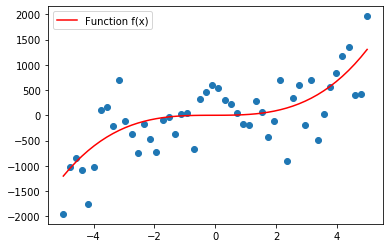

In [25]:
# Vaš kôd ovdje
X = make_instances(-5,5,50)
y = make_labels(X,f,500)
plt.scatter(X,y)
plt.plot(X,f(X),"r",label = "Function f(x)")
plt.legend()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

412590.85175251425


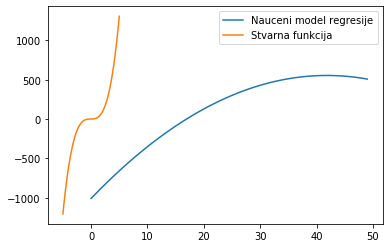

In [46]:
# Vaš kôd ovdje
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
X = make_instances(-5,5,50)
y = make_labels(X,f,700)
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

model = Ridge(alpha = 100)
model.fit(X_poly,y)

error = mean_squared_error(y,h)
print(error)

#plt.scatter(X,y)
plt.plot(model.predict(X_poly),label = "Nauceni model regresije")
plt.plot(X,f(X),label = "Stvarna funkcija")
plt.legend()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

49359.634759394474
36100.70168888745
33731.543300967336
30822.003767167123
26057.573581933313


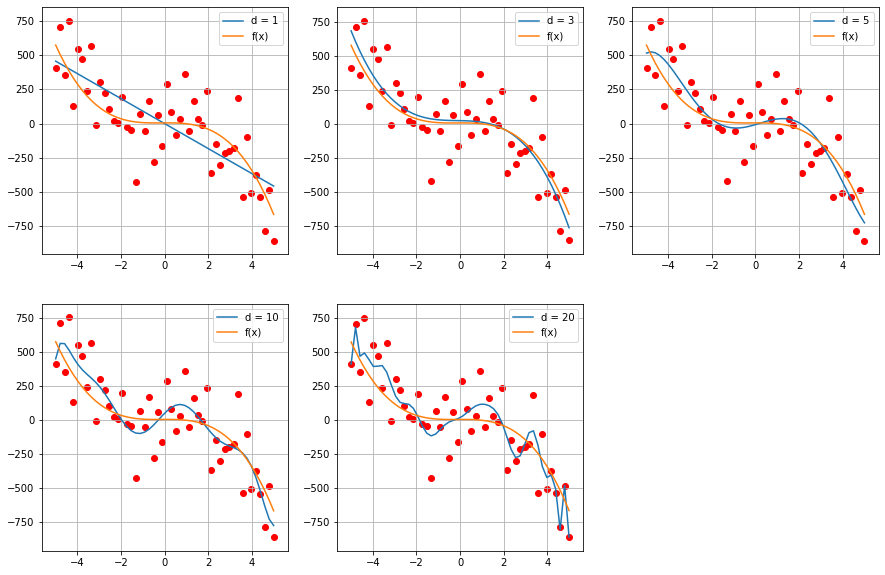

In [15]:
# Vaš kôd ovdje

X = make_instances(-5,5,50)
y = make_labels(X,f,200)
ds = [1,3,5,10,20]
plt.figure(figsize=(15,10))

j = 0
for i in range(len(ds)):
    poly = PolynomialFeatures(ds[i])
    X_i = poly.fit_transform(X)
    w = matmul(pinv(X_i),y)
    h = matmul(X_i,w)
    print(mean_squared_error(y,h))
    
    j=j+1
    plt.subplot(2,3,j)
    plt.grid()
    plt.plot(X,h,label = "d = "+str(ds[i]))
    plt.plot(X,f(X),label = "f(x)")
    plt.scatter(X,y,c = "r")
    plt.legend()
    

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
from sklearn.model_selection import train_test_split

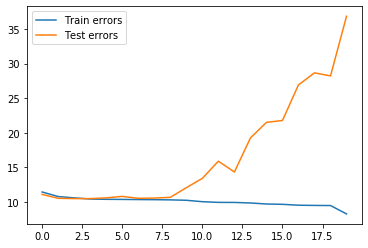

In [17]:
# Vaš kôd ovdje
X = make_instances(-5,5,50)
y = make_labels(X,f,200)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5)

train_errors = list()
test_errors = list()
for i in range(20):
    poly = PolynomialFeatures(i)
    x_i_train = poly.fit_transform(X_train)
    x_i_test = poly.fit_transform(X_test)
    w = matmul(pinv(x_i_train),y_train)
    
    h_train = matmul(x_i_train,w)
    h_test = matmul(x_i_test,w)
    
    train_errors.append(log(mean_squared_error(y_train,h_train)))
    test_errors.append(log(mean_squared_error(y_test,h_test)))


plt.plot(train_errors,label = "Train errors")
plt.plot(test_errors,label = "Test errors")
plt.legend()
    

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za sve kombinacija broja primjera $N\in\{100,200,1000\}$ i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

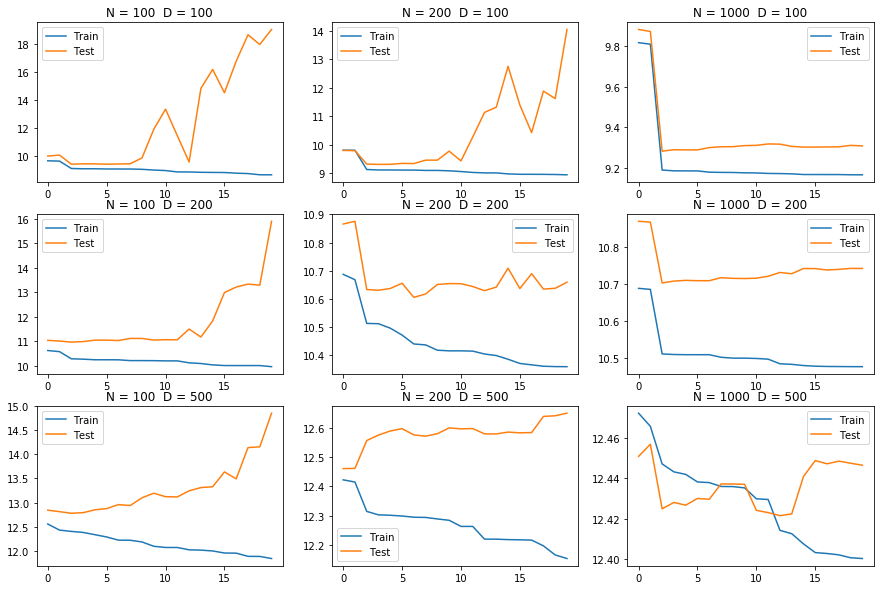

In [18]:
# Vaš kôd ovdje

plt.figure(figsize=(15,10))

Ns = [50,100,500]
noises = [100,200,500]
X = make_instances(-5,5,1000)

l=0
for i in noises:
    y_i = make_labels(X,f,i)
    for j in Ns:
        X_train,X_test,y_train,y_test = train_test_split(X,y_i,test_size = 0.5)
        l=l+1
    
        X_i_train = X_train[:j]
        X_i_test = X_test[:j]
        y_i_train = y_train[:j]
        y_i_test = y_test[:j]
     
        train_errors = []
        test_errors = []
        for k in range(1,21):
            poly = PolynomialFeatures(k)
            X_train_poly = poly.fit_transform(X_i_train)
            X_test_poly = poly.fit_transform(X_i_test)
            
            w = matmul(pinv(X_train_poly),y_i_train)
            
            h_train = matmul(X_train_poly,w)
            h_test = matmul(X_test_poly,w)
        
            train_errors.append(log(mean_squared_error(y_i_train,h_train)))
            test_errors.append(log(mean_squared_error(y_i_test,h_test)))
        plt.subplot(3,3,l)
        plt.plot(train_errors, label = "Train")
        plt.plot(test_errors, label = "Test")
        plt.legend()
        plt.title("N = "+str(j*2)+" "+" D = "+str(i))



***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


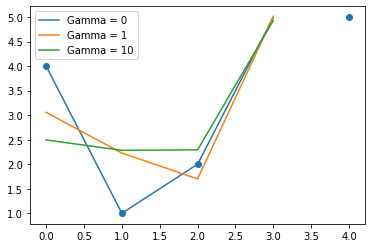

In [19]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
d = 3

poly = PolynomialFeatures(d)
X_poly = poly.fit_transform(X)

I_matrix = np.identity(d+1)
I_matrix[0][0] = 0
plt.scatter(X,y)

for gamma in [0,1,10]:
    pseudoinvers = matmul(X_poly.T,X_poly)+gamma*I_matrix
    w = matmul(matmul(inv(pseudoinvers),X_poly.T),y)
    
    h = matmul(X_poly,w)
    plt.plot(h,label = "Gamma = "+str(gamma))
    plt.legend()
    print(w)

### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [20]:
from sklearn.linear_model import Ridge

In [21]:
# Vaš kôd ovdje

for gamma in [0,1,10]:
    model = Ridge(alpha = gamma)
    model.fit(X_poly,y)
    print([(model.intercept_,model.coef_[1],model.coef_[2],model.coef_[3])])

[(4.000000000000028, -5.916666666666732, 3.375000000000027, -0.4583333333333364)]
[(3.0569614512471652, -0.6907936507936514, -0.283174603174602, 0.1445804988662129)]
[(2.4944418431229725, -0.1589729487341473, -0.13423066536848305, 0.08156009919705869)]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

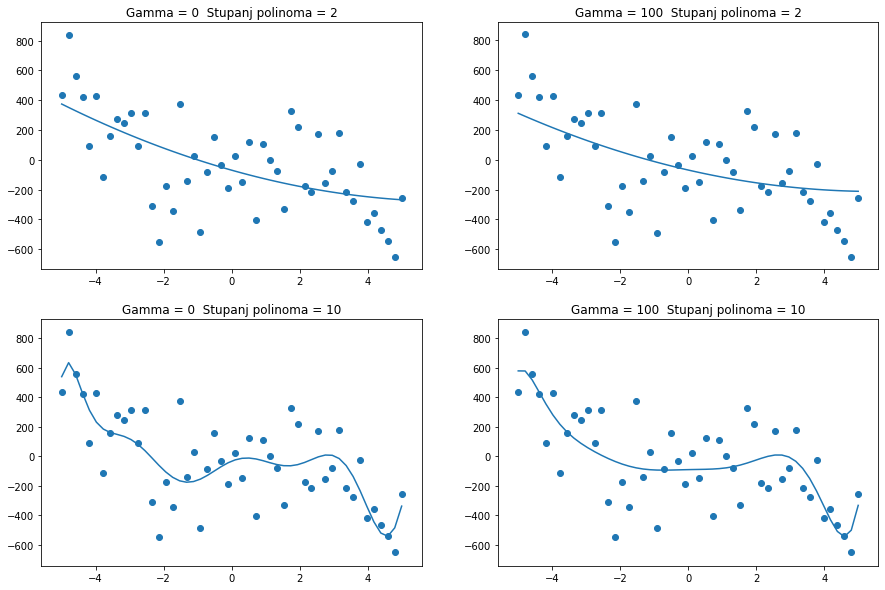

In [22]:
# Vaš kôd ovdje
plt.figure(figsize=(15,10))

X = make_instances(-5,5,50)
y = make_labels(X,f,200)

ds = [2,10]
gammas = [0,100]


i = 0
for d in ds:
    poly = PolynomialFeatures(d)
    X_poly = poly.fit_transform(X)
    I_matrix = np.identity(d+1)
    I_matrix[0][0] = 0
    for gamma in gammas:
        pseudoinvers = matmul(X_poly.T,X_poly)+gamma*I_matrix
        w = matmul(matmul(inv(pseudoinvers),X_poly.T),y)
        h = matmul(X_poly,w)
        i = i+1
         
        plt.subplot(2,2,i)
        plt.plot(X,h)
        plt.scatter(X,y)
        plt.title("Gamma = "+str(gamma)+" "+" Stupanj polinoma = "+str(d))
        
    

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


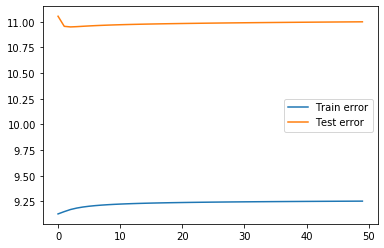

In [23]:
# Vaš kôd ovdje
from sklearn.linear_model import Ridge

X = make_instances(-5,5,50)
y = make_labels(X,f,200)
gammas = [i for i in range(50)]

poly = PolynomialFeatures(10)
X_poly = poly.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size = 0.5)
train_errors = []
test_errors = []

for gamma in gammas: 
    model = Ridge(alpha = gamma)
    model.fit(X_train,y_train)
    
    train_errors.append(log(mean_squared_error(y_train,model.predict(X_train))))
    test_errors.append(log(mean_squared_error(y_test,model.predict(X_test))))

plt.plot(train_errors,label = "Train error")
plt.plot(test_errors,label = "Test error")
plt.legend()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [24]:
def nonzeroes(coef, tol=1e-2): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

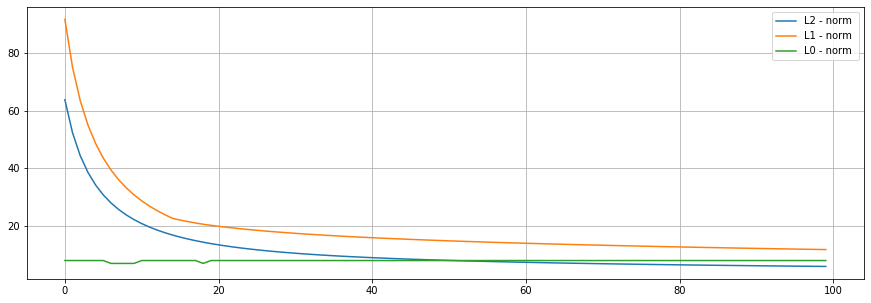

In [25]:
# Vaš kôd ovdje
from sklearn.linear_model import Ridge

gammas = [i for i in range(100)]
X = make_instances(-5,5,50)
y = make_labels(X,f,200)

poly = PolynomialFeatures(10)
X_poly = poly.fit_transform(X)

l2_norm = list()
l1_norm = list()
l0_norm = list()
for gamma in gammas:
    model = Ridge(alpha = gamma)
    model.fit(X_poly,y)
    
    w = model.coef_
    l2_norm.append(norm(w,ord = 2))
    l1_norm.append(norm(w,ord = 1))
    l0_norm.append(nonzeroes(w))
    

plt.figure(figsize(15,5))
plt.grid()
plt.plot(gammas,l2_norm,label = "L2 - norm ")
plt.plot(gammas, l1_norm, label = "L1 - norm ") 
plt.plot(gammas, l0_norm, label = "L0 - norm ") 
plt.legend()
    






### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 956716.4852113298, tolerance: 544.3511551870102
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 961146.6164704385, tolerance: 544.3511551870102
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 965134.7487979744, tolerance: 544.3511551870102
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 968938.437273280

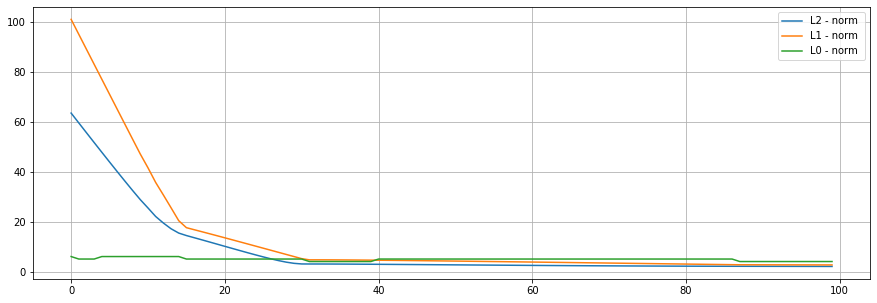

In [26]:
# Vaš kôd ovdje
from sklearn.linear_model import Lasso

gammas = [i for i in range(100)]
X = make_instances(-5,5,50)
y = make_labels(X,f,200)

poly = PolynomialFeatures(10)
X_poly = poly.fit_transform(X)

l2_norm = list()
l1_norm = list()
l0_norm = list()
for gamma in gammas:
    model = Lasso(alpha = gamma+1)
    model.fit(X_poly,y)
    
    w = model.coef_
    l2_norm.append(norm(w,ord = 2))
    l1_norm.append(norm(w,ord = 1))
    l0_norm.append(nonzeroes(w))
    

plt.figure(figsize(15,5))
plt.grid()
plt.plot(gammas,l2_norm,label = "L2 - norm ")
plt.plot(gammas, l1_norm, label = "L1 - norm ") 
plt.plot(gammas, l0_norm, label = "L0 - norm ") 
plt.legend()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [27]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

Text(0.5, 1.0, 'Ovisnost prosjecne ocjene o broju ocjeni u srednjoj')

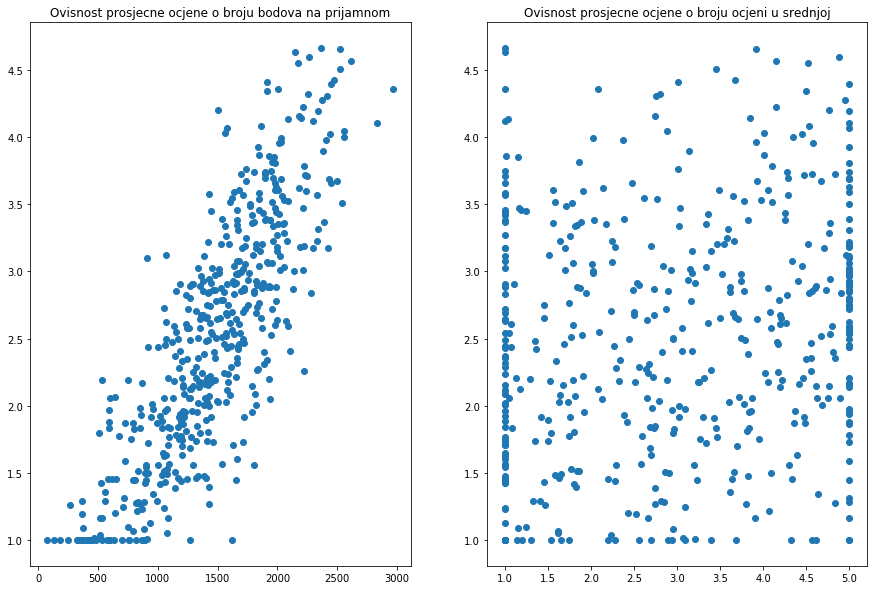

In [28]:
# Vaš kôd ovdje
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
plt.scatter(grades_X[:,0],grades_y)
plt.title("Ovisnost prosjecne ocjene o broju bodova na prijamnom")

plt.subplot(1,2,2)
plt.scatter(grades_X[:,1],grades_y)
plt.title("Ovisnost prosjecne ocjene o broju ocjeni u srednjoj")

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

[0.00141497 0.09477276]
0.15061179575776018


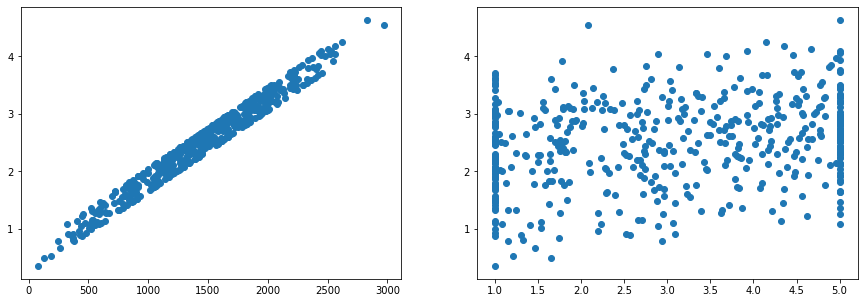

In [29]:
# Vaš kôd ovdje
from sklearn.linear_model import Ridge

model = Ridge(alpha = 0.01)
model.fit(grades_X,grades_y)

print(model.coef_)
print(model.intercept_)

plt.subplot(1,2,1)
plt.scatter(grades_X[:,0],model.predict(grades_X))

plt.subplot(1,2,2)
plt.scatter(grades_X[:,1],model.predict(grades_X))

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [30]:
from sklearn.preprocessing import StandardScaler

[[0.81630375 0.15167761]]
[8.62551331e-17]


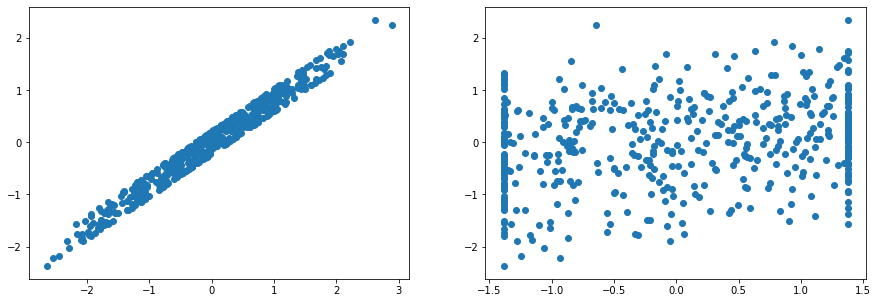

In [31]:
# Vaš kôd ovdje
from sklearn.linear_model import Ridge
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1,1))

model = Ridge(alpha = 0.01)
model.fit(grades_X_fixed,grades_y_fixed)

print(model.coef_)
print(model.intercept_)

plt.subplot(1,2,1)
plt.scatter(grades_X_fixed[:,0],model.predict(grades_X_fixed))

plt.subplot(1,2,2)
plt.scatter(grades_X_fixed[:,1],model.predict(grades_X_fixed))

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [32]:
# Vaš kôd ovdje
extra_column = grades_X_fixed[:,1]
extra_column = extra_column.reshape(-1,1)
grades_X_fixed_colinear = np.append(grades_X_fixed,extra_column,axis=1)
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [33]:
# Vaš kôd ovdje
from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.01)
model.fit(grades_X_fixed_colinear,grades_y_fixed)
print(model.coef_,model.intercept_)

[[0.81630364 0.07583957 0.07583957]] [8.6255971e-17]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [34]:
# Vaš kôd ovdje
from sklearn.linear_model import Ridge
gammas = [0.01,1000]

for gamma in gammas:
    model = Ridge(alpha = gamma)
    ws = []
    for i in range(1,11):
        grades_dataset_1,grades_dataset_2,grades_y_1,grades_y_2 = train_test_split(grades_X_fixed_colinear,grades_y,test_size = 0.5)
        model.fit(grades_dataset_1,grades_y_1)
        print(model.coef_)
        ws.append(model.coef_)
    print("")
    
    w1 = list()
    w2 = list()
    w3 = list()
    for j in range(10):
        w1.append(ws[j][0])
        w2.append(ws[j][1])
        w3.append(ws[j][2])
    print("Standard deviation w1: "+str(std(w1)))
    print("Standard deviation w2: "+str(std(w2)))
    print("Standard deviation w3: "+str(std(w3)))
    print("")

        

    


[0.71920557 0.05892704 0.05892704]
[0.73147134 0.06895112 0.06895112]
[0.73760284 0.06951859 0.06951859]
[0.75435652 0.06779841 0.06779841]
[0.72238097 0.07260145 0.07260145]
[0.74149514 0.0409969  0.0409969 ]
[0.72555863 0.05567666 0.05567666]
[0.73579711 0.06023195 0.06023195]
[0.73838298 0.04026645 0.04026645]
[0.74222475 0.06744017 0.06744017]

Standard deviation w1: 0.009989876671945841
Standard deviation w2: 0.011025157958578462
Standard deviation w3: 0.011025157958642038

[0.14861882 0.02569236 0.02569236]
[0.15001655 0.02981747 0.02981747]
[0.14806889 0.02698539 0.02698539]
[0.14581591 0.02420753 0.02420753]
[0.1481734 0.0168046 0.0168046]
[0.13702007 0.03093263 0.03093263]
[0.15308795 0.0233904  0.0233904 ]
[0.1579169  0.02197535 0.02197535]
[0.13834029 0.03081006 0.03081006]
[0.1417413  0.02875428 0.02875428]

Standard deviation w1: 0.006115415162589235
Standard deviation w2: 0.004259445034729015
Standard deviation w3: 0.004259445034729019



**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [35]:
# Vaš kôd ovdje

pseudoinvers = matmul(grades_X_fixed_colinear.T,grades_X_fixed_colinear)+0.01*diag([0,1,1])
conditional_number = cond(pseudoinvers)
print(conditional_number)

pseudoinvers = matmul(grades_X_fixed_colinear.T,grades_X_fixed_colinear)+10*diag([0,1,1])
conditional_number = cond(pseudoinvers)
print(conditional_number)

100542.85592820004
101.53146069838155


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  

In [38]:
X = np.array([[0.25],[0.5],[1],[1.5],[2]])
y = np.array([0.707,1,0,-1,0])

In [48]:
poly = PolynomialFeatures(4)
X_poly = poly.fit_transform(X)
print(X_poly)

[[1.00000e+00 2.50000e-01 6.25000e-02 1.56250e-02 3.90625e-03]
 [1.00000e+00 5.00000e-01 2.50000e-01 1.25000e-01 6.25000e-02]
 [1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00]
 [1.00000e+00 1.50000e+00 2.25000e+00 3.37500e+00 5.06250e+00]
 [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01]]


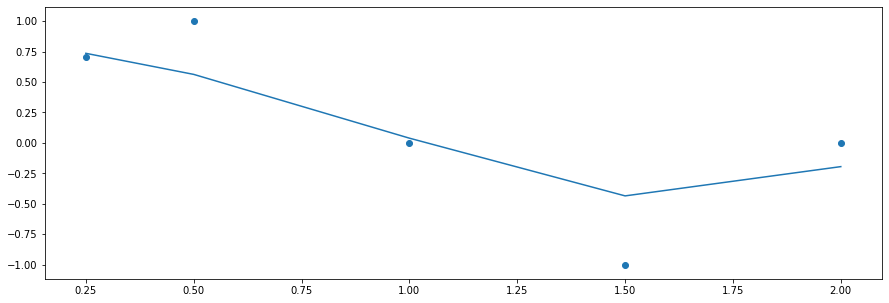

In [53]:
clf = Ridge(alpha = 1)
clf.fit(X_poly,y)
plt.plot(X,clf.predict(X_poly))
plt.scatter(X,y)

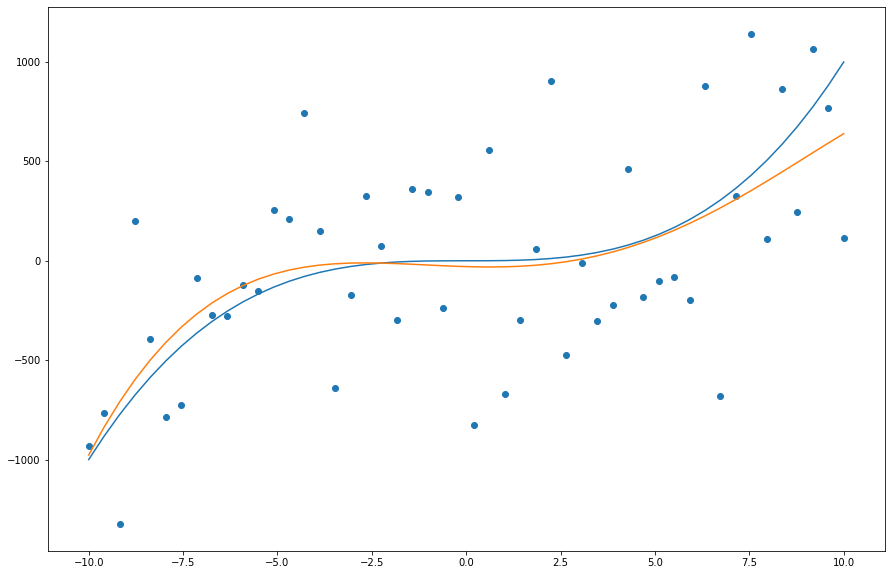

In [79]:
def fa(x):
    return x**3

def make_labels(X, f, noise=0) :
    # Vaš kôd ovdje
    y = list()
    for i in range(len(X)):
        y.append( f(X[i]) + normal(0,noise) )
    return y

plt.figure(figsize=(15,10))
points = sp.linspace(-10,10)
y = make_labels(points,fa,500)
plt.plot(points,fa(points))
plt.scatter(points,y)

X = make_instances(-10,10,50)
clf = Ridge(alpha = 1000)
poly = PolynomialFeatures(5)
X_poly = poly.fit_transform(X)
clf.fit(X_poly,y)
plt.plot(X,clf.predict(X_poly))

In [48]:
from sklearn.linear_model import LinearRegression
X = np.array([[1,-3,1],[1,-3,3],[1,1,2],[1,2,1],[1,1,-2],[1,2,-3]])
y0 = np.array([1,1,0,0,0,0])
y1 = np.array([0,0,1,1,0,0])
y2 = np.array([0,0,0,0,1,1])

clf = LinearRegression()
clf.fit(X,y0)
print(clf.coef_)
print(clf.intercept_)

[ 0.         -0.21727749 -0.0052356 ]
0.33507853403141363


In [ ]:
X = np.array([])